In [1]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

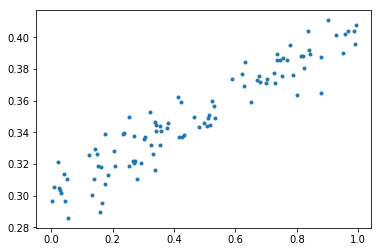

In [2]:
# Step 1: Obtain input data
# Generate synthetic data with Gaussian noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data)) #Scale is the SD of the normal distribution.
y_data = x_data * 0.1 + 0.3 + noise # assume linear source

pylab.plot(x_data, y_data, '.')

In [3]:
# Step 2: Build inference graph
W = tf.get_variable(name='W', initializer=tf.random_uniform([1], 0.0, 1.0))
b = tf.get_variable(name='b', initializer=tf.zeros([1]))
y = tf.add(x=tf.multiply(x=W, y=x_data, name='multiply'), y=b, name='addition')

In [4]:
# print(W.name)
# print(b.name)

In [5]:
# Step 3: Build training graph
loss = tf.reduce_mean(tf.square(y-y_data), name='loss') # create an operation that calculate mean-squared loss.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5, name='optimizer') # create an optimization operation.
train = optimizer.minimize(loss, name='train') # create a training operation
init = tf.global_variables_initializer() # create a variable initialization operator.

# Note that at this point we have only built the graph, none of the operations are executed.

In [6]:
# print(tf.get_default_graph().as_graph_def())

In [7]:
# Step 4: Create Session and launch graph
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

In [8]:
# Step 5: Train the graph
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run([W, b]))

0 [array([ 0.17268911], dtype=float32), array([ 0.34825492], dtype=float32)]
20 [array([ 0.11392207], dtype=float32), array([ 0.29614079], dtype=float32)]
40 [array([ 0.10735538], dtype=float32), array([ 0.29941115], dtype=float32)]
60 [array([ 0.1057153], dtype=float32), array([ 0.30022794], dtype=float32)]
80 [array([ 0.10530568], dtype=float32), array([ 0.30043194], dtype=float32)]
100 [array([ 0.10520336], dtype=float32), array([ 0.3004829], dtype=float32)]
120 [array([ 0.10517779], dtype=float32), array([ 0.30049562], dtype=float32)]
140 [array([ 0.10517142], dtype=float32), array([ 0.30049878], dtype=float32)]
160 [array([ 0.10516983], dtype=float32), array([ 0.30049959], dtype=float32)]
180 [array([ 0.10516945], dtype=float32), array([ 0.3004998], dtype=float32)]
200 [array([ 0.1051694], dtype=float32), array([ 0.3004998], dtype=float32)]


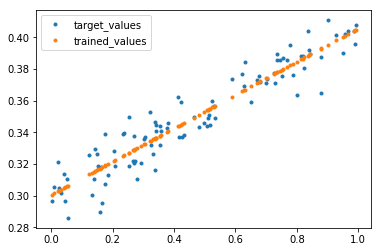

In [9]:
pylab.plot(x_data, y_data, '.', label="target_values")
# pylab.plot(x_data, y_initial_values, '.', label="initial_values")
pylab.plot(x_data, sess.run(y), '.', label="trained_values")
pylab.legend()
# pylab.ylim(0, 1.0)

In [10]:
writer = tf.summary.FileWriter('./my_graph', sess.graph)

In [11]:
writer.close()
sess.close()